In [52]:
from datascience import *
%matplotlib inline
path_data = '.../.../.../assets/data/'

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

## Bootstrap

In [53]:
sf = Table.read_table('san_francisco_2019.csv')
min_salary = 15*20*50
sf = sf.where('Salary', are.above(min_salary))

In [54]:
sf.num_rows

37103

c:\users\admin\pycharmprojects\lib\site-packages\datascience\tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


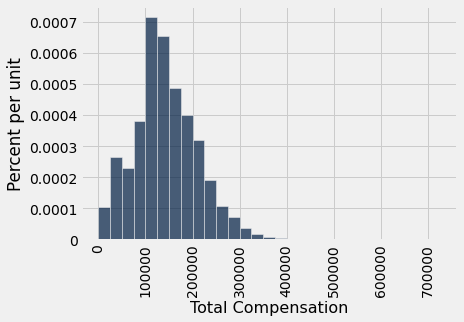

In [55]:
sf_bins = np.arange(0, 726000, 25000)
sf.hist('Total Compensation', bins=sf_bins)

In [56]:
#Median total compensation in the population
pop_median = percentile(50, sf.column('Total Compensation'))
pop_median 

135747

## Bootstrap Estimate of the Parameter (Pretend We Don't Know)

In [57]:
#One random sample
our_sample = sf.sample(400, with_replacement=False)

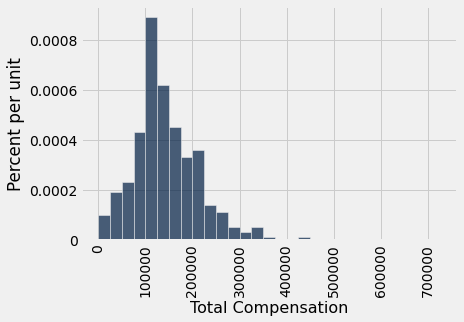

In [58]:
our_sample.hist('Total Compensation', bins=sf_bins)

In [59]:
 percentile(50, our_sample.column('Total Compensation'))

131986

In [60]:
#This is just one of them

## Carrying Out the Bootstrap

In [61]:
#Sample Randomly
#with replacement
# same number of times as rows of table

def one_bootstrap_median():
    #draws a bootstrap sample
    resample = our_sample.sample()
    
    #return the median total compensation in the bootstrap sample
    return percentile(50, resample.column('Total Compensation'))

In [62]:
one_bootstrap_median()

125085

In [63]:
#Generate the median of 3000 bootstrap samples

num_repetitions = 3000
bstrap_medians = make_array()
for i in np.arange(num_repetitions):
    bstrap_medians = np.append(bstrap_medians, one_bootstrap_median())

## Percentile Method: Middle 95% of the Bootstrap Estimates

In [64]:
left = percentile(2.5, bstrap_medians)
right = percentile(97.5, bstrap_medians)

make_array(left, right)

array([121842., 138206.])

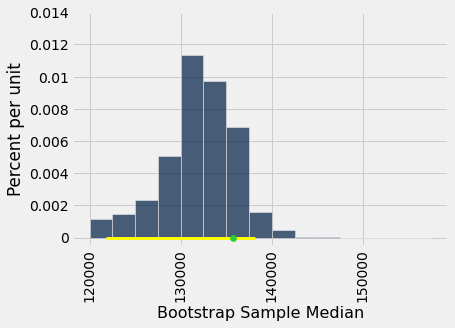

In [65]:
resampled_medians = Table().with_column('Bootstrap Sample Median', bstrap_medians)
median_bins=np.arange(120000, 160000, 2500)
resampled_medians.hist(bins=median_bins)



#Plotting parameters
parameter_green = '#32CD32'
plt.ylim(-0.000005, 0.00014)

plt.plot(make_array(left, right), make_array(0,0), color='yellow', lw=3, zorder=1)

plt.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2)


## Lecture 24 

## Take a look at the lectures

# Confidence Interval for Unknown Population Mean

In [66]:
#Random sample of mother-newborn pairs
births = Table.read_table('baby.csv')

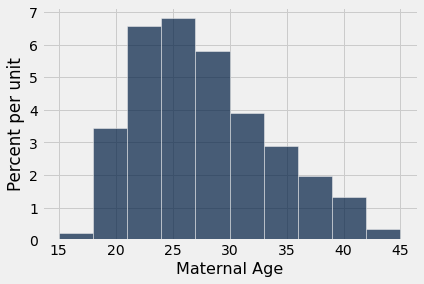

In [67]:
births.hist('Maternal Age')

In [68]:
#Average age of mother-newborn pairs
np.average(births.column('Maternal Age'))

27.228279386712096

### QUESTION

### What is the average age of the mothers in the population?

### **Plan for estimating this parameter** 

####   - Bootstrap
####    - Find mean of each
####    - Repeat this process
####    - Graph all the means (from an array of means)
####    - 95% confidence interval : 2.5th to 97.5th percentiles of the array

In [85]:
def one_bootstrap_mean():
    resample = births.sample()
    return np.average(resample.column('Maternal Age'))

In [86]:
#Generate means from 3000 bootstrap samples
num_repetitions = 3000
bstrap_means = make_array()
for i in np.arange(num_repetitions):
    bstrap_means = np.append(bstrap_means, one_bootstrap_mean())

In [71]:
#For middle 95%

In [87]:
left = percentile(2.5, bstrap_means)
right = percentile(97.5, bstrap_means)

make_array(left, right)

array([26.88500852, 27.5528109 ])

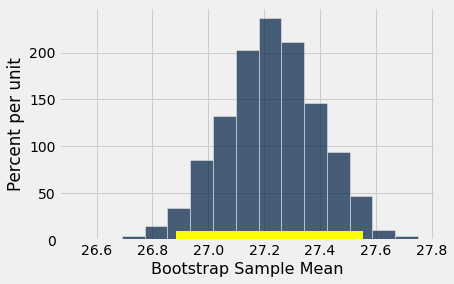

In [88]:
resampled_means = Table().with_column(
    'Bootstrap Sample Mean', bstrap_means)
resampled_means.hist(bins=15)
plt.plot([left, right], [0,0], color='yellow', lw=18)

## Analogous, a 90% Confidence Interval

In [89]:
left = percentile(5, bstrap_means)
right = percentile(95, bstrap_means)

make_array(left, right)

array([26.94122658, 27.50681431])

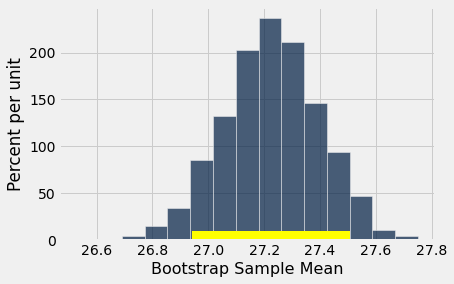

In [90]:
resampled_means = Table().with_column(
    'Bootstrap Sample Mean', bstrap_means)
resampled_means.hist(bins=15)
plt.plot([left, right], [0,0], color='yellow', lw=18)

##           *MUST BE APPROXIMATELY BELL-SHAPED*

## Using the Confidence Interval for Testing Hypotheses

#### Null: The average age of mothers in the population is 25 years;  random sample average is different due to chance
#### Alternative: The average age of the mothers in the population is not 25 years

### Suppose you use the 5% cutoff for the p-value
### Based on the confidence interval, which hypothesis would you pick

# THIS IS EQUIVALENT (at times BETTER) than TESTING FOR HYPOTHESES!


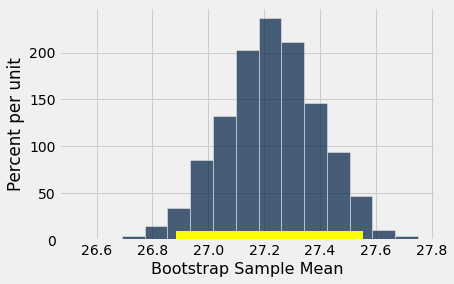

In [92]:
left = percentile(2.5, bstrap_means)
right = percentile(97.5, bstrap_means)

make_array(left, right)

resampled_means = Table().with_column(
    'Bootstrap Sample Mean', bstrap_means)
resampled_means.hist(bins=15)
plt.plot([left, right], [0,0], color='yellow', lw=18)